In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In [39]:
df = pd.read_csv("2019-Nov.csv")

In [40]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [41]:
df.shape

(67501979, 9)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [43]:
df.describe()

,product_id,category_id,price,user_id
count,6.750198e+07,6.750198e+07,6.750198e+07,6.750198e+07
mean,1.251406e+07,2.057898e+18,2.924593e+02,5.386397e+08
std,1.725741e+07,2.012549e+16,3.556745e+02,2.288516e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,1.030022e+07
25%,1.305977e+06,2.053014e+18,6.924000e+01,5.164762e+08
50%,5.100568e+06,2.053014e+18,1.657700e+02,5.350573e+08
75%,1.730075e+07,2.053014e+18,3.603400e+02,5.610794e+08
max,1.000286e+08,2.187708e+18,2.574070e+03,5.799699e+08


In [44]:
missing_data = df.isnull().sum()
print(missing_data)

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64


In [45]:
#check if all category_id which equal to 2053013555631882655 belong to electronics.smartphone category_code
#so we could drop category code column because it has redundant information (the same info is in category_code)
#and missing values
all(df.loc[df.category_id == 2053013555631882655]['category_code'] == 'electronics.smartphone')

True

In [46]:
#let's not delete it
#df.drop('category_code', axis=1, inplace = True)

In [47]:
df.duplicated().sum()

100519

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [50]:
df['day'] = df['event_time'].dt.day

In [51]:
df['weekday'] = df['event_time'].dt.weekday

In [52]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
day                            int64
weekday                        int64
dtype: object

In [53]:
df.event_type.value_counts()

view        63554512
cart         2930018
purchase      916930
Name: event_type, dtype: int64

In [54]:
df.brand.value_counts()

samsung         7864090
apple           6246475
xiaomi          4630595
huawei          1407728
lucente         1183398
                 ...   
gladiator             1
arba                  1
luciasvetlaa          1
della                 1
nowodvorski           1
Name: brand, Length: 4200, dtype: int64

In [55]:
#replace missing values in brand column with 'NaN_brand'
#df['brand'][pd.isnull(df['brand'])]  = 'NaN_brand'

In [56]:
#df.brand.isnull().sum()

In [57]:
df = pd.get_dummies(df, columns=['event_type'])

In [58]:
#df.to_csv("intermediate_results.csv", index=False)

In [59]:
#df = pd.read_csv("intermediate_results.csv")

In [60]:
#df = pd.get_dummies(df, columns=['brand']) - my kernel died, have to use tree based algorithm 
#which can deal with categorical values

In [61]:
df.dtypes

event_time             datetime64[ns, UTC]
product_id                           int64
category_id                          int64
category_code                       object
brand                               object
price                              float64
user_id                              int64
user_session                        object
day                                  int64
weekday                              int64
event_type_cart                      uint8
event_type_purchase                  uint8
event_type_view                      uint8
dtype: object

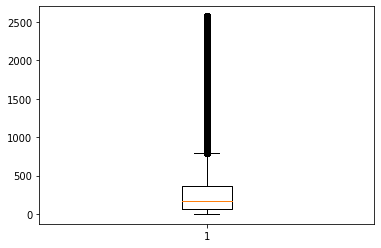

In [62]:
plt.boxplot(df['price'])
plt.show()

In [63]:
df['price'].quantile(0.95)

992.16

In [64]:
# Create categorical bins from a numeric column
df['price_category'] = pd.cut(df['price'], bins=[0, 992.16, df['price'].max()], labels=['Regular_price', 'High_price'])

In [65]:
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,day,weekday,event_type_cart,event_type_purchase,event_type_view,price_category
0,2019-11-01 00:00:00+00:00,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,1,4,0,0,1,Regular_price
1,2019-11-01 00:00:00+00:00,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,1,4,0,0,1,Regular_price
2,2019-11-01 00:00:01+00:00,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,1,4,0,0,1,Regular_price
3,2019-11-01 00:00:01+00:00,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,1,4,0,0,1,Regular_price
4,2019-11-01 00:00:01+00:00,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,1,4,0,0,1,Regular_price


In [66]:
df.to_csv("cleaned_data.csv", index=False)

In [67]:
# Aggregate sales by day
day_sales = df.groupby('day')['price'].sum()

In [68]:
day_sales

day
1     4.255417e+08
2     4.546700e+08
3     4.668842e+08
4     5.316031e+08
5     4.951270e+08
6     4.894839e+08
7     5.124538e+08
8     5.540806e+08
9     5.457345e+08
10    5.701244e+08
11    5.790556e+08
12    5.829116e+08
13    6.020026e+08
14    9.919976e+08
15    1.893429e+09
16    1.994470e+09
17    1.872044e+09
18    5.845095e+08
19    4.893616e+08
20    4.662367e+08
21    4.473181e+08
22    4.373952e+08
23    4.396618e+08
24    4.467188e+08
25    4.393592e+08
26    4.548109e+08
27    4.558206e+08
28    4.713870e+08
29    5.285133e+08
30    4.910025e+08
Name: price, dtype: float64

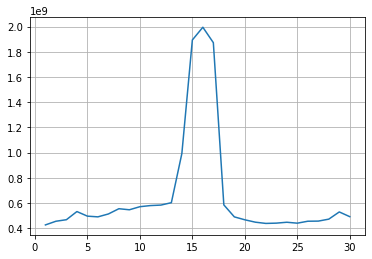

In [69]:
plt.plot(day_sales)
plt.grid()
plt.show()

In [70]:
# Group by 'day' and count the unique 'user_id's for each day
user_counts_by_day = df.groupby('day')['user_id'].nunique().reset_index()

In [71]:
# Rename the columns for clarity
user_counts_by_day.columns = ['day', 'user_count']

In [72]:
user_counts_by_day

,day,user_count
0,1,223108
1,2,234685
2,3,240187
3,4,275612
4,5,262338
5,6,256887
6,7,278988
7,8,286053
8,9,268643
9,10,276198


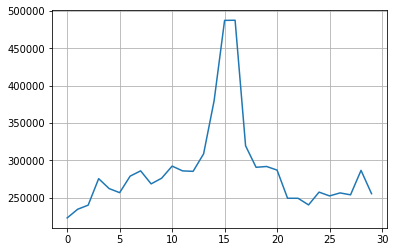

In [73]:
plt.plot(user_counts_by_day['user_count'])
plt.grid()
plt.show()

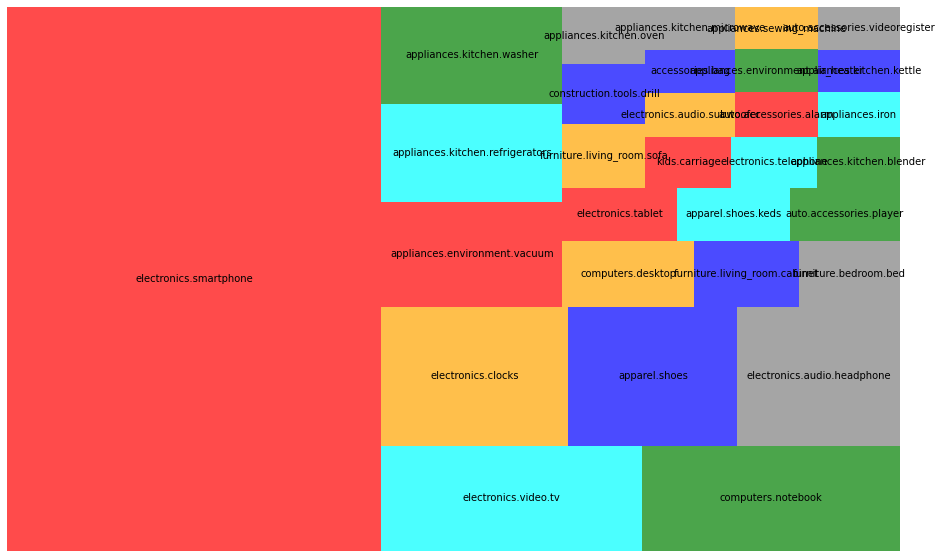

In [79]:
plt.figure(figsize = (16, 10))
top_category_n = 30
top_category = df.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

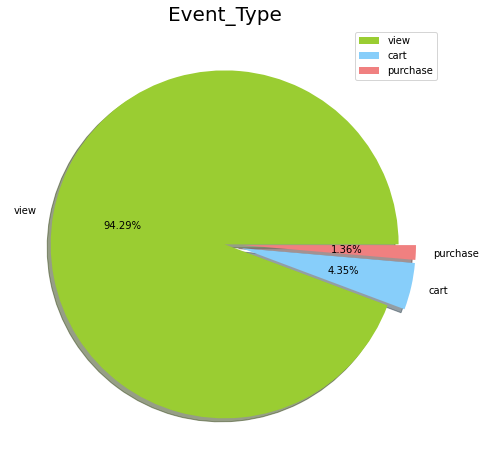

In [109]:
labels = ['view', 'cart','purchase'] 
size = [data['event_type_view'].sum(), data['event_type_cart'].sum(),data['event_type_purchase'].sum()]
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [90]:
#find what brands sellers buy
purchase = df.loc[data['event_type_purchase'] == 1]
purchase = purchase.dropna(axis='rows')

top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,198669
apple,165681
xiaomi,57908
huawei,23466
oppo,15080
lg,11828
artel,7267
lenovo,6546
acer,6402


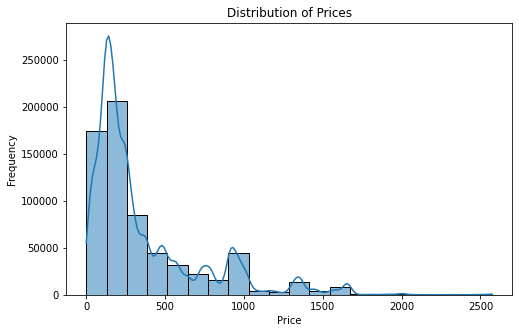

In [91]:
# Histogram of prices of purchases

plt.figure(figsize=(8, 5))
sns.histplot(purchase['price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

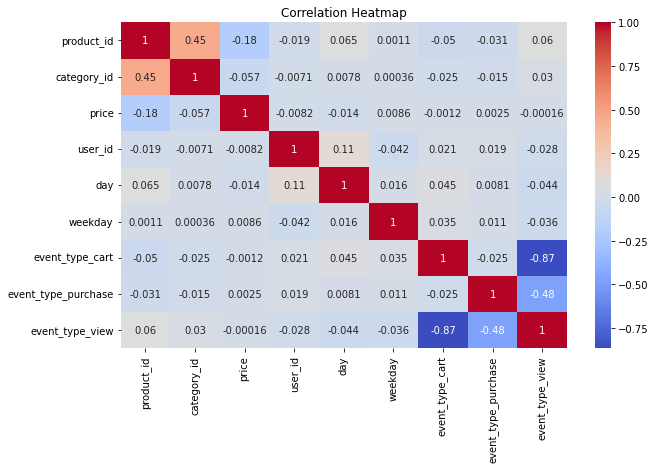

In [92]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

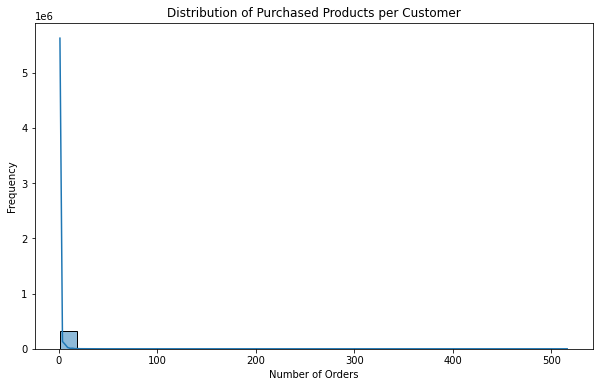

In [94]:
# Calculate the number of purchased products per customer
orders_per_customer = purchase.groupby('user_id')['product_id'].count().reset_index()

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer['product_id'], bins=30, kde=True)
plt.title('Distribution of Purchased Products per Customer')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

In [95]:
purchase.isna().sum()

event_time             0
product_id             0
category_id            0
category_code          0
brand                  0
price                  0
user_id                0
user_session           0
day                    0
weekday                0
event_type_cart        0
event_type_purchase    0
event_type_view        0
price_category         0
dtype: int64

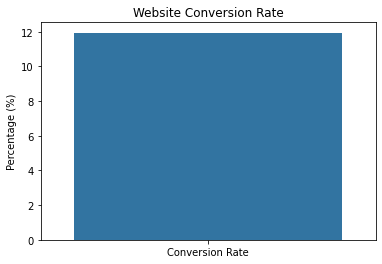

In [96]:
#Calculate and visualize conversion rates, i.e., the percentage of users who made a purchase after visiting 
#the website.

# Calculate conversion rates 
total_visits = df['user_id'].nunique()
total_purchases = df[df['event_type_purchase'] == 1]['user_id'].nunique()
conversion_rate = (total_purchases / total_visits) * 100

# Visualize conversion rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Conversion Rate'], y=[conversion_rate])
plt.title('Website Conversion Rate')
plt.ylabel('Percentage (%)')
plt.show()

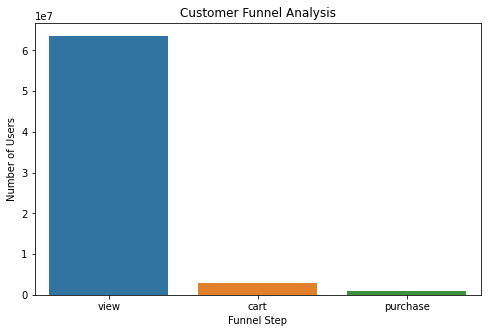

In [112]:
#Create a funnel analysis to understand the steps users take from visiting the site to making a purchase.
# Define the funnel steps
funnel_steps = ['view', 'cart', 'purchase']

# Calculate the number of users at each step
#funnel_counts = data[data['event_type'].isin(funnel_steps)].groupby('event_type')['user_id'].nunique()

# Visualize the funnel
plt.figure(figsize=(8, 5))
sns.barplot(x=funnel_steps, y=size)
plt.title('Customer Funnel Analysis')
plt.xlabel('Funnel Step')
plt.ylabel('Number of Users')
plt.show()
